In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv("nac2015.csv", encoding='latin1') 

df = df[df["COD_DPTO"]==20] #Filtramos solo el departamento del cauca

df = df[['AREANAC','PESO_NAC','TALLA_NAC','T_GES','NUMCONSUL','TIPO_PARTO','EDAD_MADRE','EST_CIVM',"IDPERTET",'NIV_EDUM','N_HIJOSV', "CODPTORE"]]

#limpiamos de nan
df = df.dropna()

df.head()

,AREANAC,PESO_NAC,TALLA_NAC,T_GES,NUMCONSUL,TIPO_PARTO,EDAD_MADRE,EST_CIVM,IDPERTET,NIV_EDUM,N_HIJOSV,CODPTORE
371,1,7,5,4,10,2,5,6,6,9,2,20.0
388,1,6,5,4,9,2,7,1,6,3,2,20.0
413,1,6,5,4,9,2,6,1,6,8,3,20.0
443,1,7,5,4,7,1,6,6,6,8,4,44.0
444,1,6,5,4,6,1,6,1,6,3,1,20.0


Algunas visualizaciones de los datos que se van a utilizar:

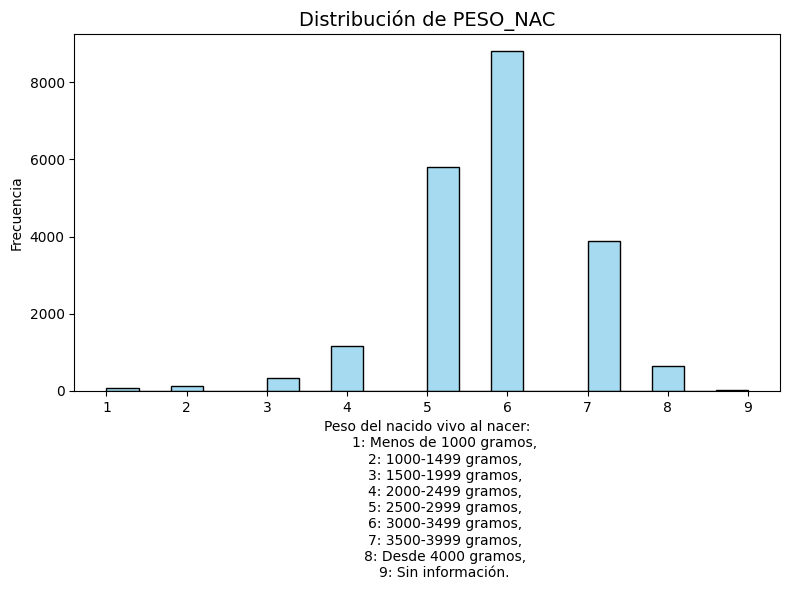

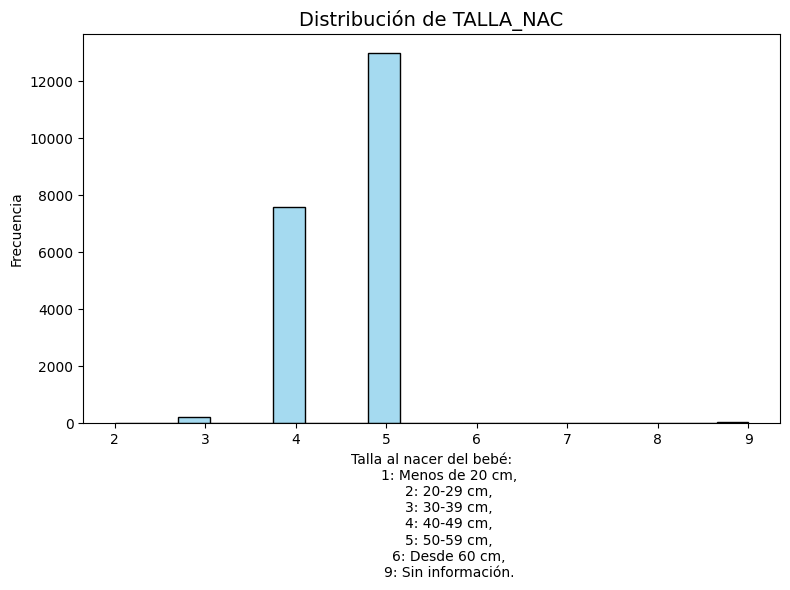

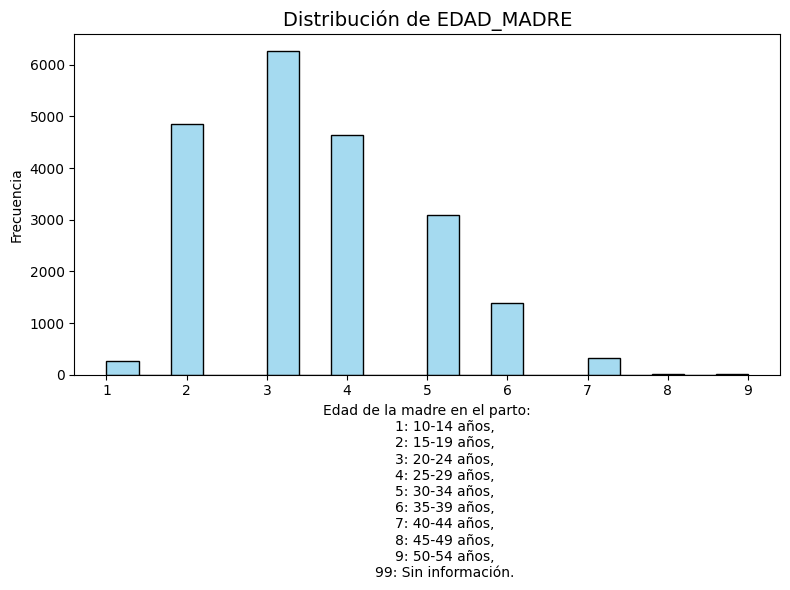

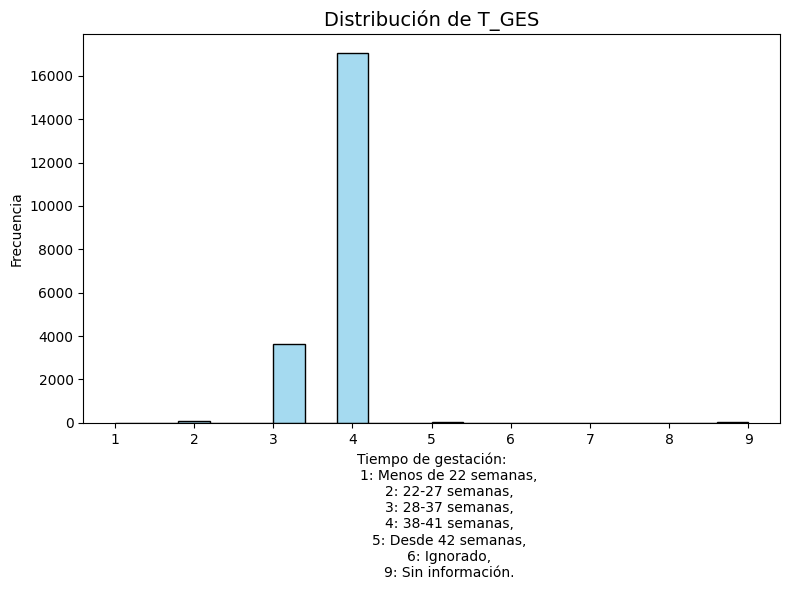

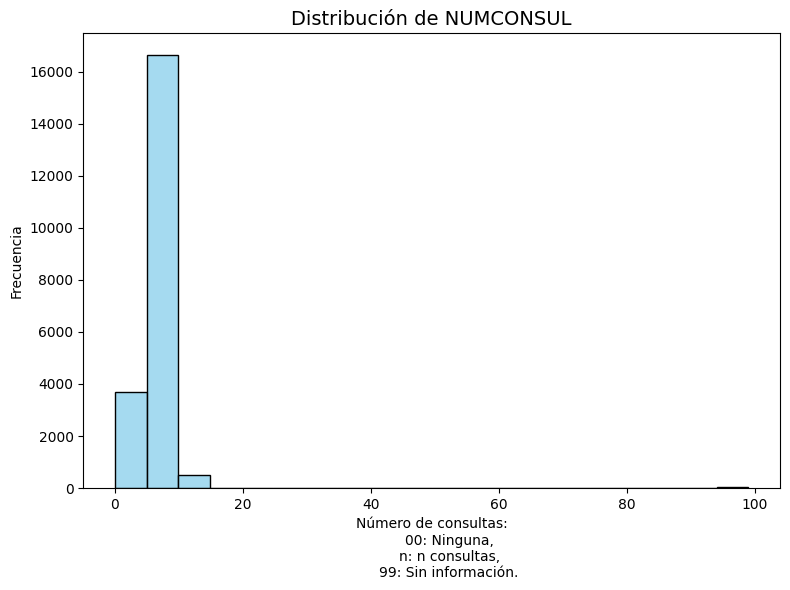

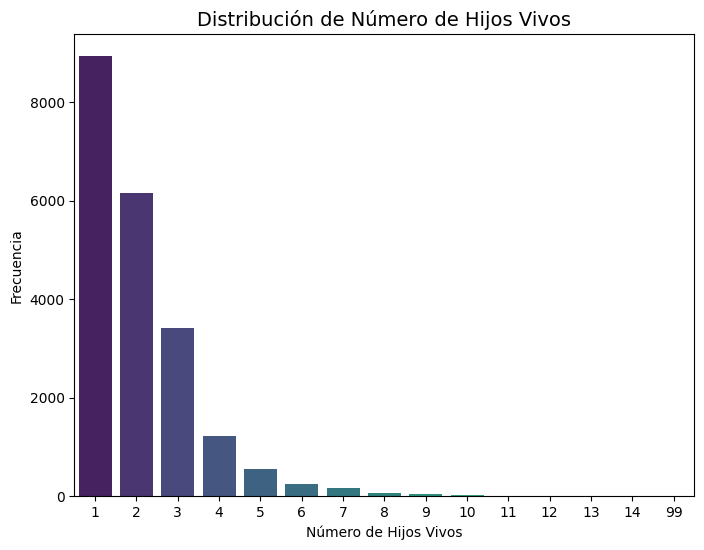

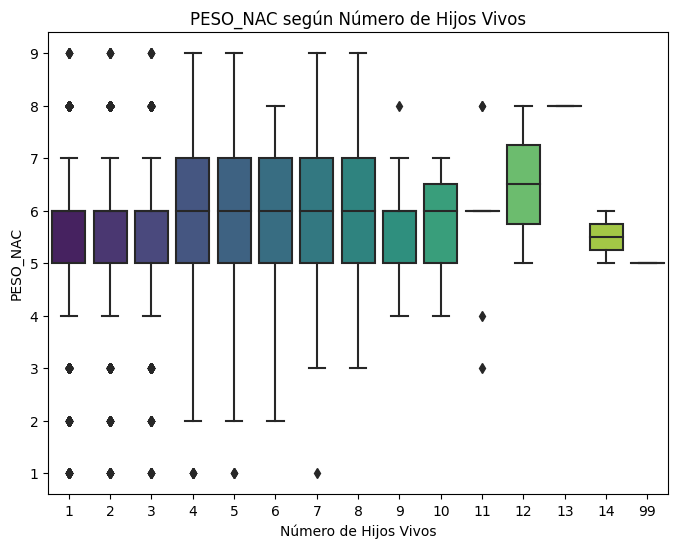

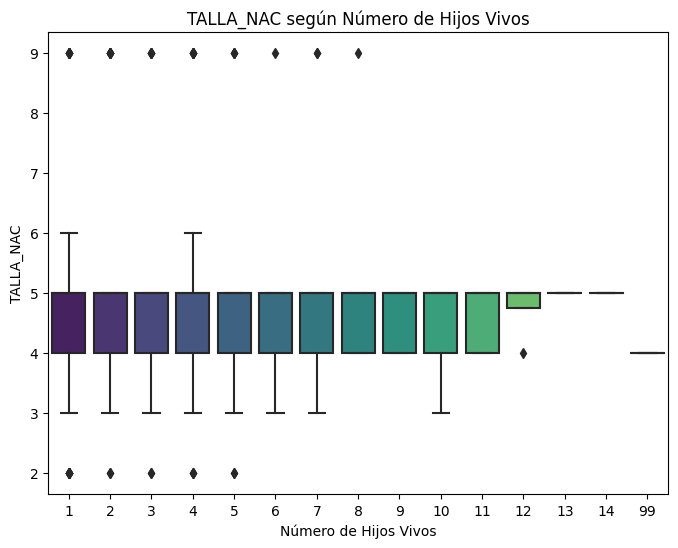

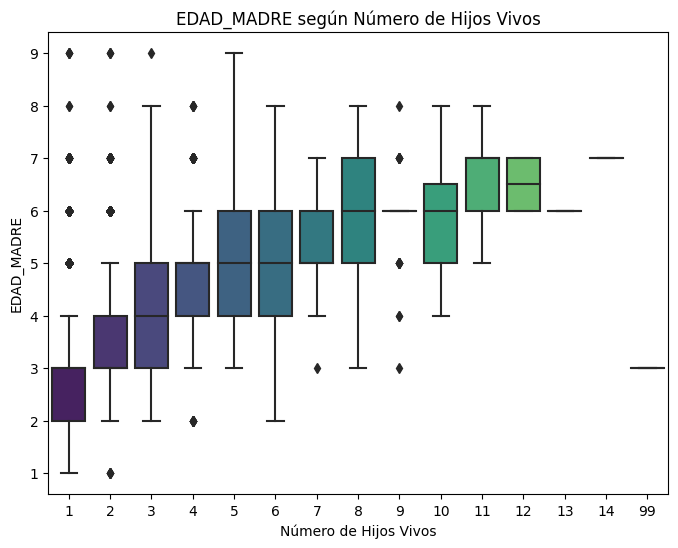

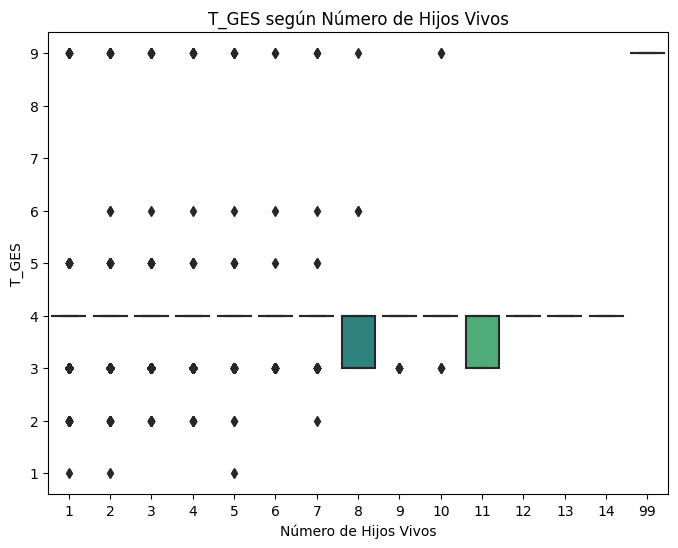

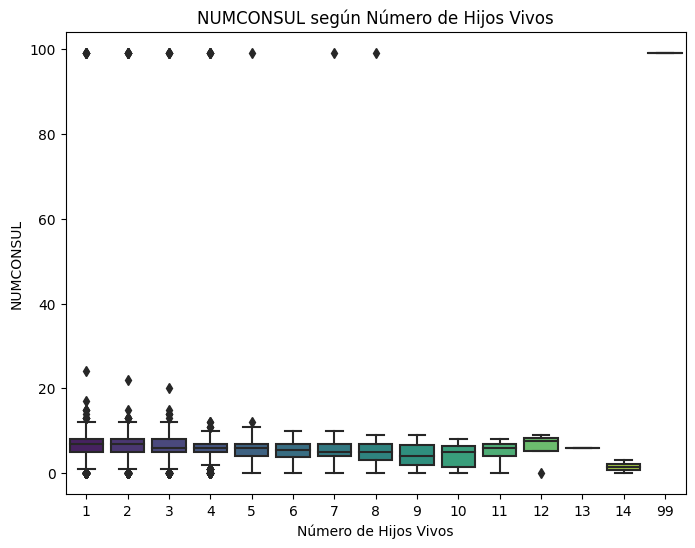

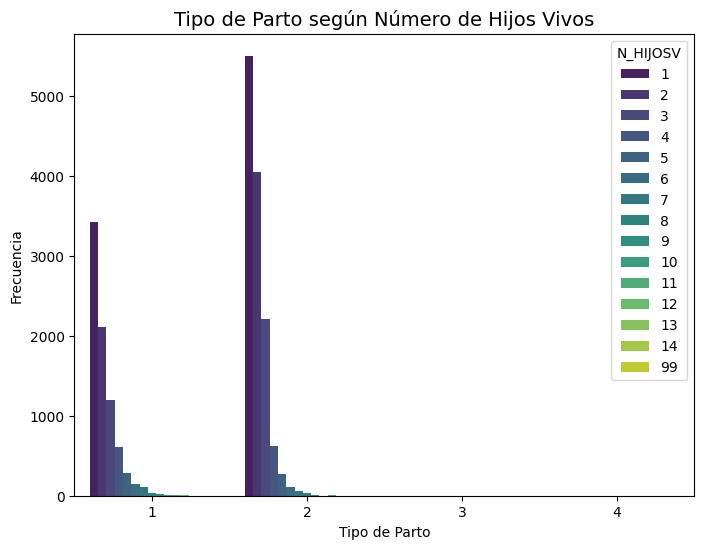

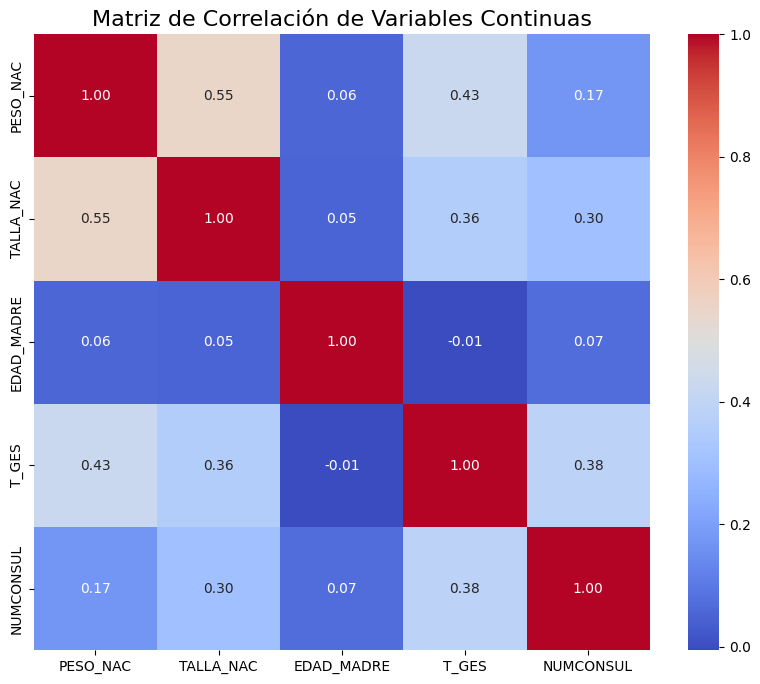

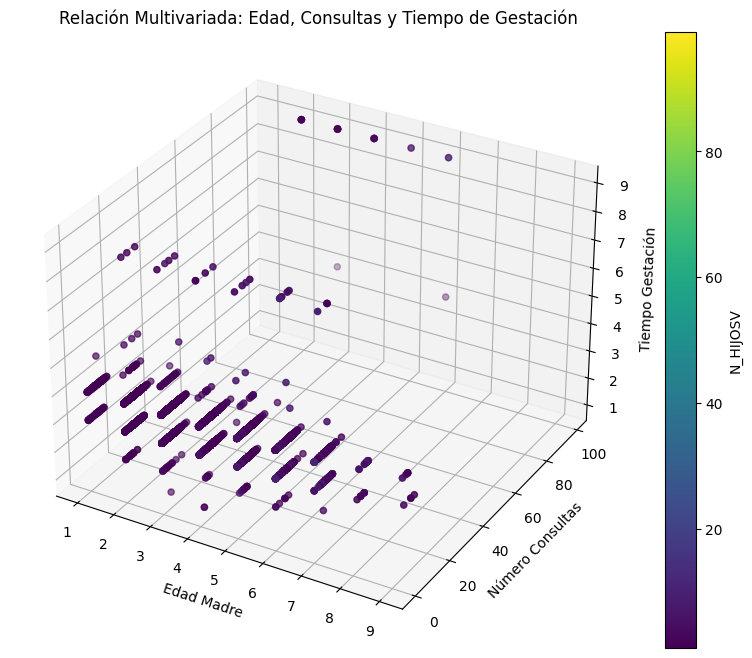

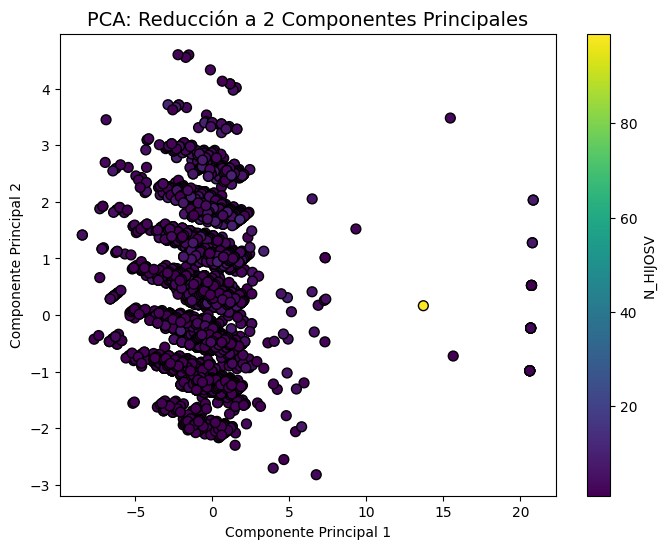

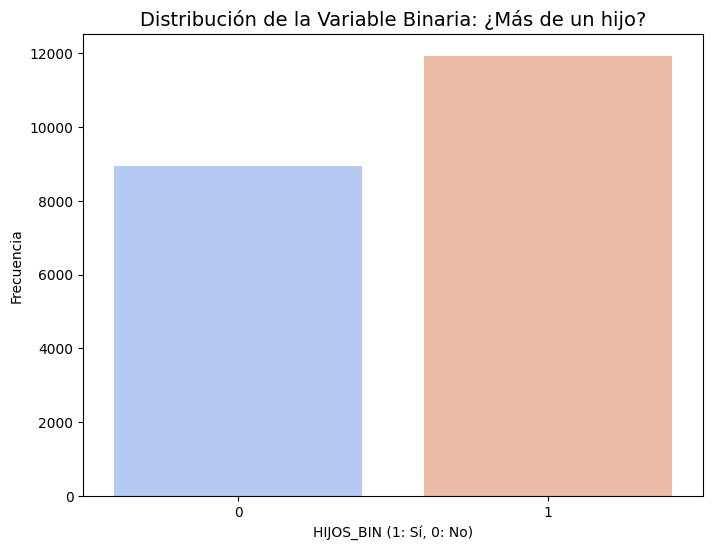

In [ ]:

import os

# Crear el directorio para guardar las gráficas
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

# Diccionario con las descripciones detalladas y rangos de valores
descripciones = {
    'PESO_NAC': """Peso del nacido vivo al nacer:
        1: Menos de 1000 gramos,
        2: 1000-1499 gramos,
        3: 1500-1999 gramos,
        4: 2000-2499 gramos,
        5: 2500-2999 gramos,
        6: 3000-3499 gramos,
        7: 3500-3999 gramos,
        8: Desde 4000 gramos,
        9: Sin información.""",
    'TALLA_NAC': """Talla al nacer del bebé:
        1: Menos de 20 cm,
        2: 20-29 cm,
        3: 30-39 cm,
        4: 40-49 cm,
        5: 50-59 cm,
        6: Desde 60 cm,
        9: Sin información.""",
    'EDAD_MADRE': """Edad de la madre en el parto:
        1: 10-14 años,
        2: 15-19 años,
        3: 20-24 años,
        4: 25-29 años,
        5: 30-34 años,
        6: 35-39 años,
        7: 40-44 años,
        8: 45-49 años,
        9: 50-54 años,
        99: Sin información.""",
    'T_GES': """Tiempo de gestación:
        1: Menos de 22 semanas,
        2: 22-27 semanas,
        3: 28-37 semanas,
        4: 38-41 semanas,
        5: Desde 42 semanas,
        6: Ignorado,
        9: Sin información.""",
    'NUMCONSUL': """Número de consultas:
        00: Ninguna,
        n: n consultas,
        99: Sin información."""
}

# Lista de variables continuas
variables_continuas = ['PESO_NAC', 'TALLA_NAC', 'EDAD_MADRE', 'T_GES', 'NUMCONSUL']

# Generar gráficas con las descripciones y rangos
for var in variables_continuas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], color='skyblue', bins=20)  # Sin líneas en las barras
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xlabel(f'{descripciones[var]}', fontsize=10)
    plt.ylabel('Frecuencia')
    plt.tight_layout()  # Ajustar el layout para evitar solapamientos
    plt.savefig(f"{output_dir}/distribucion_{var}.png", dpi=300)
    plt.show()
    plt.close()


# 2. Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='N_HIJOSV', data=df, palette='viridis')
plt.title('Distribución de Número de Hijos Vivos', fontsize=14)
plt.xlabel('Número de Hijos Vivos')
plt.ylabel('Frecuencia')
plt.savefig(f"{output_dir}/distribucion_N_HIJOSV.png", dpi=300)
plt.show()
plt.close()

# 3. Boxplots: Relación entre variables continuas y N_HIJOSV
for var in variables_continuas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='N_HIJOSV', y=var, data=df, palette='viridis')
    plt.title(f'{var} según Número de Hijos Vivos')
    plt.xlabel('Número de Hijos Vivos')
    plt.ylabel(var)
    plt.savefig(f"{output_dir}/boxplot_{var}_N_HIJOSV.png", dpi=300)
    plt.show()
    plt.close()

# 4. Barras agrupadas: TIPO_PARTO y N_HIJOSV
plt.figure(figsize=(8, 6))
sns.countplot(x='TIPO_PARTO', hue='N_HIJOSV', data=df, palette='viridis')
plt.title('Tipo de Parto según Número de Hijos Vivos', fontsize=14)
plt.xlabel('Tipo de Parto')
plt.ylabel('Frecuencia')
plt.legend(title='N_HIJOSV')
plt.savefig(f"{output_dir}/barras_TIPO_PARTO_N_HIJOSV.png", dpi=300)
plt.show()
plt.close()

# 5. Matriz de correlación
corr_matrix = df[variables_continuas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación de Variables Continuas', fontsize=16)
plt.savefig(f"{output_dir}/matriz_correlacion.png", dpi=300)
plt.show()
plt.close()

# 6. Relación multivariada 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['EDAD_MADRE'], df['NUMCONSUL'], df['T_GES'], c=df['N_HIJOSV'], cmap='viridis')
ax.set_xlabel('Edad Madre')
ax.set_ylabel('Número Consultas')
ax.set_zlabel('Tiempo Gestación')
plt.colorbar(sc, label='N_HIJOSV')
plt.title('Relación Multivariada: Edad, Consultas y Tiempo de Gestación')
plt.savefig(f"{output_dir}/relacion_multivariada_3D.png", dpi=300)
plt.show()
plt.close()

# 7. PCA: Reducción a 2 Componentes Principales
X = df[variables_continuas]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['N_HIJOSV'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: Reducción a 2 Componentes Principales', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='N_HIJOSV')
plt.savefig(f"{output_dir}/pca_reduccion.png", dpi=300)
plt.show()
plt.close()


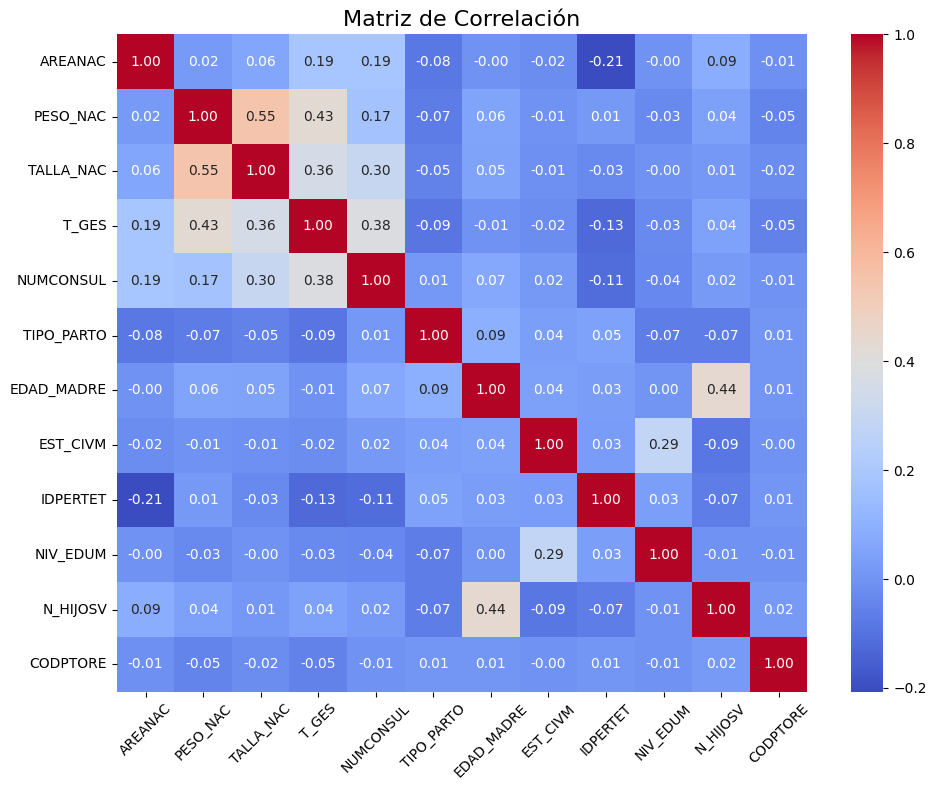

In [5]:
output_dir = "images"
# Calcular la matriz de correlación
correlation_matrix = df.corr(method='pearson')
#correlation_matrix = df.corr(method='spearman')
#correlation_matrix = df.corr(method='kendall')


# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Personalizar la gráfica
plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

#plt.savefig(f"{output_dir}/correlacion_variables_Nhijos.png", dpi=300)
# Mostrar la gráfica
plt.show()
plt.close()

In [14]:
df.columns

Index(['AREANAC', 'PESO_NAC', 'TALLA_NAC', 'T_GES', 'NUMCONSUL', 'TIPO_PARTO',
       'EDAD_MADRE', 'EST_CIVM', 'IDPERTET', 'NIV_EDUM', 'N_HIJOSV',
       'CODPTORE', 'HIJOS_BIN'],
      dtype='object')

In [3]:
# Separar las variables independientes (X) de la variable dependiente (y)
X = df.drop(columns=['N_HIJOSV']) 
y = df['N_HIJOSV']

# Convertir la variable objetivo en binaria (1 si es 1, 0 si es mayor a 1)
y = (y == 1).astype(int)
X.columns

Index(['AREANAC', 'PESO_NAC', 'TALLA_NAC', 'T_GES', 'NUMCONSUL', 'TIPO_PARTO',
       'EDAD_MADRE', 'EST_CIVM', 'IDPERTET', 'NIV_EDUM', 'CODPTORE'],
      dtype='object')

In [4]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.columns

Index(['AREANAC', 'PESO_NAC', 'TALLA_NAC', 'T_GES', 'NUMCONSUL', 'TIPO_PARTO',
       'EDAD_MADRE', 'EST_CIVM', 'IDPERTET', 'NIV_EDUM', 'CODPTORE'],
      dtype='object')

In [5]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:


# Crear un pipeline para probar diferentes preprocesamientos y configuraciones
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Manejo de NaN
    ('scaler', StandardScaler()),                # Escalado
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),  # Selección de características
    ('svc', SVC())                               # Modelo SVM
])

# Configuraciones para GridSearchCV
param_grid = {
    'imputer__strategy': ['median'],        # Estrategia para imputar valores
    'scaler': [MinMaxScaler()],   # Escalado estándar o MinMax
    'feature_selection__k': [5, 10, 'all'],         # Selección de características
    'svc__kernel': ['rbf', 'poly'],       # Tipos de kernel
    'svc__C': [0.1, 1, 10,15],                         # Parámetro de regularización
    'svc__gamma': ['scale', 'auto'],                # Parámetro gamma
    'svc__degree': [2, 3, 4, 5]                     # Grado del polinomio para el kernel 'poly'
}

# Configurar GridSearchCV para optimizar hiperparámetros y estrategias
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,  # Validación cruzada con 5 particiones
    verbose=0,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión (Accuracy):", accuracy_score(y_test, y_pred))

# Evaluación adicional
print("Validación cruzada (accuracy):", cross_val_score(mejor_modelo, X_train, y_train, cv=5).mean())


In [9]:
# Mejor configuración encontrada
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión (Accuracy):", accuracy_score(y_test, y_pred))

# Evaluación adicional
print("Validación cruzada (accuracy):", cross_val_score(mejor_modelo, X_train, y_train, cv=5).mean())


Mejores parámetros: {'feature_selection__k': 5, 'imputer__strategy': 'mean', 'scaler': MinMaxScaler(), 'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00      1797

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172

Precisión (Accuracy): 1.0
Validación cruzada (accuracy): 1.0


/home/max/miniconda3/envs/estadistica/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/max/miniconda3/envs/estadistica/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/max/miniconda3/envs/estadistica/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/max/miniconda3/envs/estadistica/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/home/max/miniconda3/envs/estadistica/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [6]:
# Crear la configuración óptima en un pipeline
best_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),       # Imputación de valores faltantes
    ('scaler', MinMaxScaler()),                        # Escalado de características
    ('feature_selection', SelectKBest(k='all')),       # Selección de características
    ('svc', SVC(C=10, gamma='scale', kernel='poly', degree=3))   # Modelo SVM con la mejor configuración
])

# Entrenar el modelo con los datos de entrenamiento
best_pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)

# Evaluación del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred)}")

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2375
           1       0.76      0.63      0.69      1797

    accuracy                           0.76      4172
   macro avg       0.76      0.74      0.74      4172
weighted avg       0.76      0.76      0.75      4172

Precisión (Accuracy): 0.7550335570469798


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

def evaluar_modelo(modelo, X_test, y_test):
    """
    Evalúa un modelo de clasificación utilizando múltiples métricas y genera un gráfico de la curva ROC.
    
    Parámetros:
        modelo: Modelo de clasificación ya entrenado.
        X_test: Conjunto de características de prueba.
        y_test: Etiquetas verdaderas del conjunto de prueba.
    """
    # Predicciones del modelo
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "No disponible"
    
    # Imprimir reporte
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print(f"Precisión (Accuracy): {accuracy:.2f}")
    print(f"Precisión (Precision): {precision:.2f}")
    print(f"Sensibilidad (Recall): {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {auc:.2f}" if auc != "No disponible" else "AUC-ROC: No disponible")
    
    # Graficar la curva ROC
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], 'r--', label="Línea Aleatoria")
        plt.xlabel("Tasa de Falsos Positivos (FPR)")
        plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
        plt.title("Curva ROC")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("El modelo no proporciona probabilidades (predict_proba), no se puede graficar la curva ROC.")

# Ejemplo de uso con un modelo entrenado
evaluar_modelo(best_pipeline, X_train, y_test)


ValueError: Found input variables with inconsistent numbers of samples: [4172, 16688]

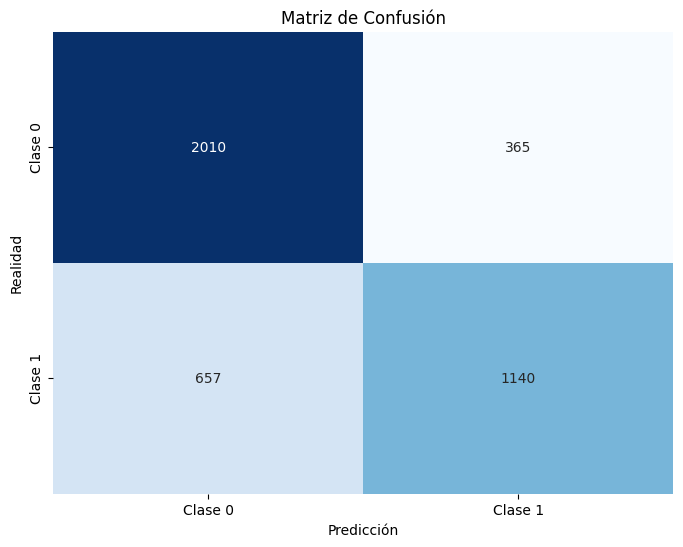

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
#plt.savefig(f"{output_dir}/matriz_confusion_SVC.png", dpi=300)
# Mostrar la gráfica
plt.show()
plt.close()